## import

In [22]:
import missingno as msno

In [44]:
raw_genre_gn_all = pd.read_json('./raw_data/genre_gn_all.json', typ = 'seriese')
raw_song_meta = pd.read_json('./raw_data/song_meta.json')
raw_test = pd.read_json('./raw_data/test.json')
raw_train = pd.read_json('./raw_data/train.json')
raw_val = pd.read_json('./raw_data/val.json')

## 장르

In [45]:
genre_gn_all = pd.DataFrame(raw_genre_gn_all, columns = ['genre_name']).reset_index().rename(columns={"index" : "genre_code"})

In [46]:
genre_gn_all.head()

,genre_code,genre_name
0,GN0100,발라드
1,GN0101,세부장르전체
2,GN0102,'80
3,GN0103,'90
4,GN0104,'00


In [47]:
genre_gn_all['genre_name'].unique()

array(['발라드', '세부장르전체', "'80", "'90", "'00", "'10-", '댄스', '랩/힙합',
       '랩 스타일', '보컬 스타일', '언더그라운드 힙합', '시대별', 'R&B/Soul', '어반', 'R&B',
       '인디음악', '포크', '록', '일렉', '힙합', '록/메탈', "'70", '성인가요', '신세대트로트',
       '전설의트로트', '뽕짝트로트', '트로트메들리', "트로트'60-'70", "트로트'80-'90", "트로트'00-",
       "성인가요'80-'90", "성인가요'00-", '포크/블루스', "'60-'70", "'80-'90", 'POP',
       '얼터너티브팝', '올디스', '월드팝', '모던록', '얼터너티브록', '프로그레시브/아트록', '하드록',
       '헤비메탈', '뉴메탈/하드코어', '포스트록', "'60", '일렉트로니카', '하우스', '클럽뮤직',
       '일렉트로닉팝', '팝랩', '얼터너티브힙합', '갱스터/하드코어랩', 'East&West', '컨템포러리 R&B',
       '소울', '포크/블루스/컨트리', '블루스', '컨트리', "'00-", 'OST', '국내영화', '국외영화',
       '국내드라마', '국외드라마', '애니메이션/게임', '국내뮤지컬', '국외뮤지컬', '애니메이션/웹툰', '게임',
       '클래식', '관현악', '교향곡', '실내악', '협주곡', '독주곡', '오페라', '크로스오버', '현대음악',
       '성악/합창곡', '발레/무용', '지휘/연주자', '컴필레이션', '교향/관현악', '오페라/성악', '재즈',
       '보컬재즈', '애시드/퓨전/팝', 'Bop', '보사노바', 'J-Jazz', '라틴재즈', '빅밴드/스윙',
       '악기별', '뉴에이지', '이지리스닝', 'J-Newage', '기능성음악', '기타', '피아노', 'J-POP',
 

### genre_code : 대분류

In [56]:
genre_code = genre_gn_all[genre_gn_all['genre_code'].str[-2:] == "00"]
genre_code.head()

,genre_code,genre_name
0,GN0100,발라드
6,GN0200,댄스
12,GN0300,랩/힙합
18,GN0400,R&B/Soul
22,GN0500,인디음악


### dtl_genre_code : 소분류

In [70]:
dtl_genre_code = genre_gn_all[genre_gn_all['genre_code'].str[-2:] != "00"]
dtl_genre_code.columns = ['dtl_genre_code','dtl_genre_name']
dtl_genre_code.head()

,dtl_genre_code,dtl_genre_name
1,GN0101,세부장르전체
2,GN0102,'80
3,GN0103,'90
4,GN0104,'00
5,GN0105,'10-


### genre : 장르 전체 df

In [74]:
genre_code['join_code'] = genre_code['genre_code'].str[:4]
dtl_genre_code['join_code'] = dtl_genre_code['dtl_genre_code'].str[:4]

genre = pd.merge(genre_code, dtl_genre_code, how = 'left', on = 'join_code')
genre = genre[['genre_code','genre_name','dtl_genre_code','dtl_genre_name']]
genre

,genre_code,genre_name,dtl_genre_code,dtl_genre_name
0,GN0100,발라드,GN0101,세부장르전체
1,GN0100,발라드,GN0102,'80
2,GN0100,발라드,GN0103,'90
3,GN0100,발라드,GN0104,'00
4,GN0100,발라드,GN0105,'10-
...,...,...,...,...
220,GN2800,뮤직테라피,GN2806,반려동물
221,GN2900,뮤지컬,GN2901,세부장르전체
222,GN2900,뮤지컬,GN2902,국내뮤지컬
223,GN2900,뮤지컬,GN2903,국외뮤지컬


## 곡
- list안에 들어있는 값들은 유니크한 값이 아님

In [98]:
raw_song_meta.head()

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4


In [99]:
# 장르 분류가 이상한듯
raw_song_meta[raw_song_meta['song_name']=="그남자 그여자"]

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4
214165,"[GN1802, GN1801]",20110830,The One,2009237,[561054],그남자 그여자,[GN1800],[Gene Guynes],214165
306681,[GN0101],20090112,뉴 발라드 베스트,471062,[2727],그남자 그여자,[GN0100],[Various Artists],306681
511554,[GN0101],20090903,블로그에서 배경음악으로 가장 많이 사랑받는 인기가요발라드,659252,[2727],그남자 그여자,[GN0100],[Various Artists],511554
525595,"[GN1502, GN1501]",20071228,첼로의 향기,362762,[2727],그남자 그여자,[GN1500],[Various Artists],525595
698986,"[GN1501, GN1504]",20100916,결혼해주세요 OST,1025523,"[431646, 25975]",그남자 그여자,[GN1500],"[예송, 조은희 (Joni)]",698986


In [25]:
song_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707989 entries, 0 to 707988
Data columns (total 9 columns):
song_gn_dtl_gnr_basket    707989 non-null object
issue_date                707989 non-null int64
album_name                707985 non-null object
album_id                  707989 non-null int64
artist_id_basket          707989 non-null object
song_name                 707989 non-null object
song_gn_gnr_basket        707989 non-null object
artist_name_basket        707989 non-null object
id                        707989 non-null int64
dtypes: int64(3), object(6)
memory usage: 48.6+ MB


# train & test data

In [110]:
train.head()

,tags,id,plylst_title,songs,like_cnt,updt_date
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000


In [111]:
train.sort_values(by="like_cnt",ascending=False)[:10]

,tags,id,plylst_title,songs,like_cnt,updt_date
46524,"[노동요, 취향저격, 드라이브, Pop, 기분전환, 트렌디, 스트레스, 신나는]",74220,HOT TRENDY POP: 놓쳐선 안될 'POP' (매주 업데이트),"[159317, 368264, 600999, 274905, 643023, 24070...",53211,2020-04-17 14:32:23.000
85071,"[감성, 새벽, 때껄룩, 잔잔한, 휴식, 팝송, 떼껄룩, 힐링, 팝, 신나는]",122388,❤️때껄룩님 ᴛᴀᴋᴇ ᴀ ʟᴏᴏᴋ 플레이리스트❤️,"[532771, 383775, 432753, 176384, 152694, 60126...",41844,2020-04-23 20:58:45.000
102651,"[매장음악, 카페, 러블리쏘, 분위기, 드라이브, 여행, 매력적인, 기분전환, 팝]",26174,듣다보면 '우와!' 하고 제목을 보게되는 팝,"[40160, 20039, 561488, 20051, 16242, 256568, 7...",27268,2020-04-19 21:22:11.000
101464,"[흥겨운, 드라이브, Pop, 기분전환, 경쾌한, 외출, 내적댄스, 기분업, 충전,...",72658,"약속 있어? 외출 전, 기분 UP 하고 싶을 때 들어봐! [매주 목요일]","[111779, 406878, 417725, 129878, 357770, 34879...",23965,2020-04-22 16:05:39.000
59894,"[힐링, 휴식, 기분전환]",113501,감성이 터지는 팝음악들,"[342524, 1233, 417666, 394523, 107455, 17206, ...",23732,2015-07-29 08:25:35.000
32411,"[신비로운, 비오는날, 밤, 신비, 몽환, 뉴에이지, 팝]",72684,신비롭거나 몽환적 느낌이 나는 곡,"[282155, 390973, 161304, 281488, 371473, 82671...",23032,2017-04-05 12:52:09.000
31406,[카페],38507,♪중독성강한음악들♪,"[195197, 487343, 434533, 105845, 433543, 45583...",21045,2019-11-29 09:10:58.000
1519,"[휴식, 밤, 잔잔한, 새벽, 감성, 뉴에이지, 피아노, 밤에듣기좋은노래]",39508,제목이 기억안나서 못들었던 뉴에이지,"[420205, 229473, 621441, 337447, 291668, 35854...",20677,2019-11-30 23:25:24.000
40950,"[봄, 가을, 달달, 명곡, 힐링, 설렘, 사랑]",102123,여자들 취향저격하는 달달한 노래,"[481910, 216728, 460884, 547506, 541420, 10636...",20149,2019-11-08 05:31:14.000
74816,"[감성, 밤, 여름밤, 새벽감성, 새벽, 밤에듣기좋은노래, 새벽에듣기좋은노래, 잠들...",11762,불 꺼진 방 침대 속 자기 직전... 듣기 좋은 노래 ⭐,"[13815, 366786, 454528, 451593, 61159, 231078,...",19758,2020-04-17 03:16:32.000


In [103]:
raw_test

,tags,id,plylst_title,songs,like_cnt,updt_date
0,[],70107,,"[398985, 449403, 411543, 528044, 143048, 98020...",6,2012-09-29 01:57:26.000
1,"[나만의Best3, 인디아티스트들의추천음악]",7461,,"[196298, 269984, 267805, 175867, 529244, 63825...",0,2019-12-17 14:06:45.000
2,[드라이브],90348,,"[273433, 331003, 68432, 411659, 117793, 616860...",21,2015-05-23 10:44:48.000
3,[분위기],58617,,"[702227, 48152, 440008, 358488, 701041, 540721...",0,2019-03-14 09:47:34.000
4,[],102395,,"[630683, 481582, 528550, 285114, 506667, 17922...",38,2018-07-11 16:43:32.000
...,...,...,...,...,...,...
10735,[추억],137930,,"[323755, 397594, 445908, 570242, 221853, 20018...",16,2016-04-18 11:02:09.000
10736,"[띵곡의, 우울, 분위기, 드라이브, 산책]",936,,"[105140, 582252, 199262, 422915, 547967, 48791...",1,2020-04-08 07:15:59.000
10737,[기분전환],110589,,"[21976, 207746, 40025, 31635, 567462, 641799, ...",6,2016-06-29 00:57:21.000
10738,[여름],2605,,"[234554, 265033, 507260, 83092, 366757, 497097...",4,2015-06-06 09:52:01.000


# validation

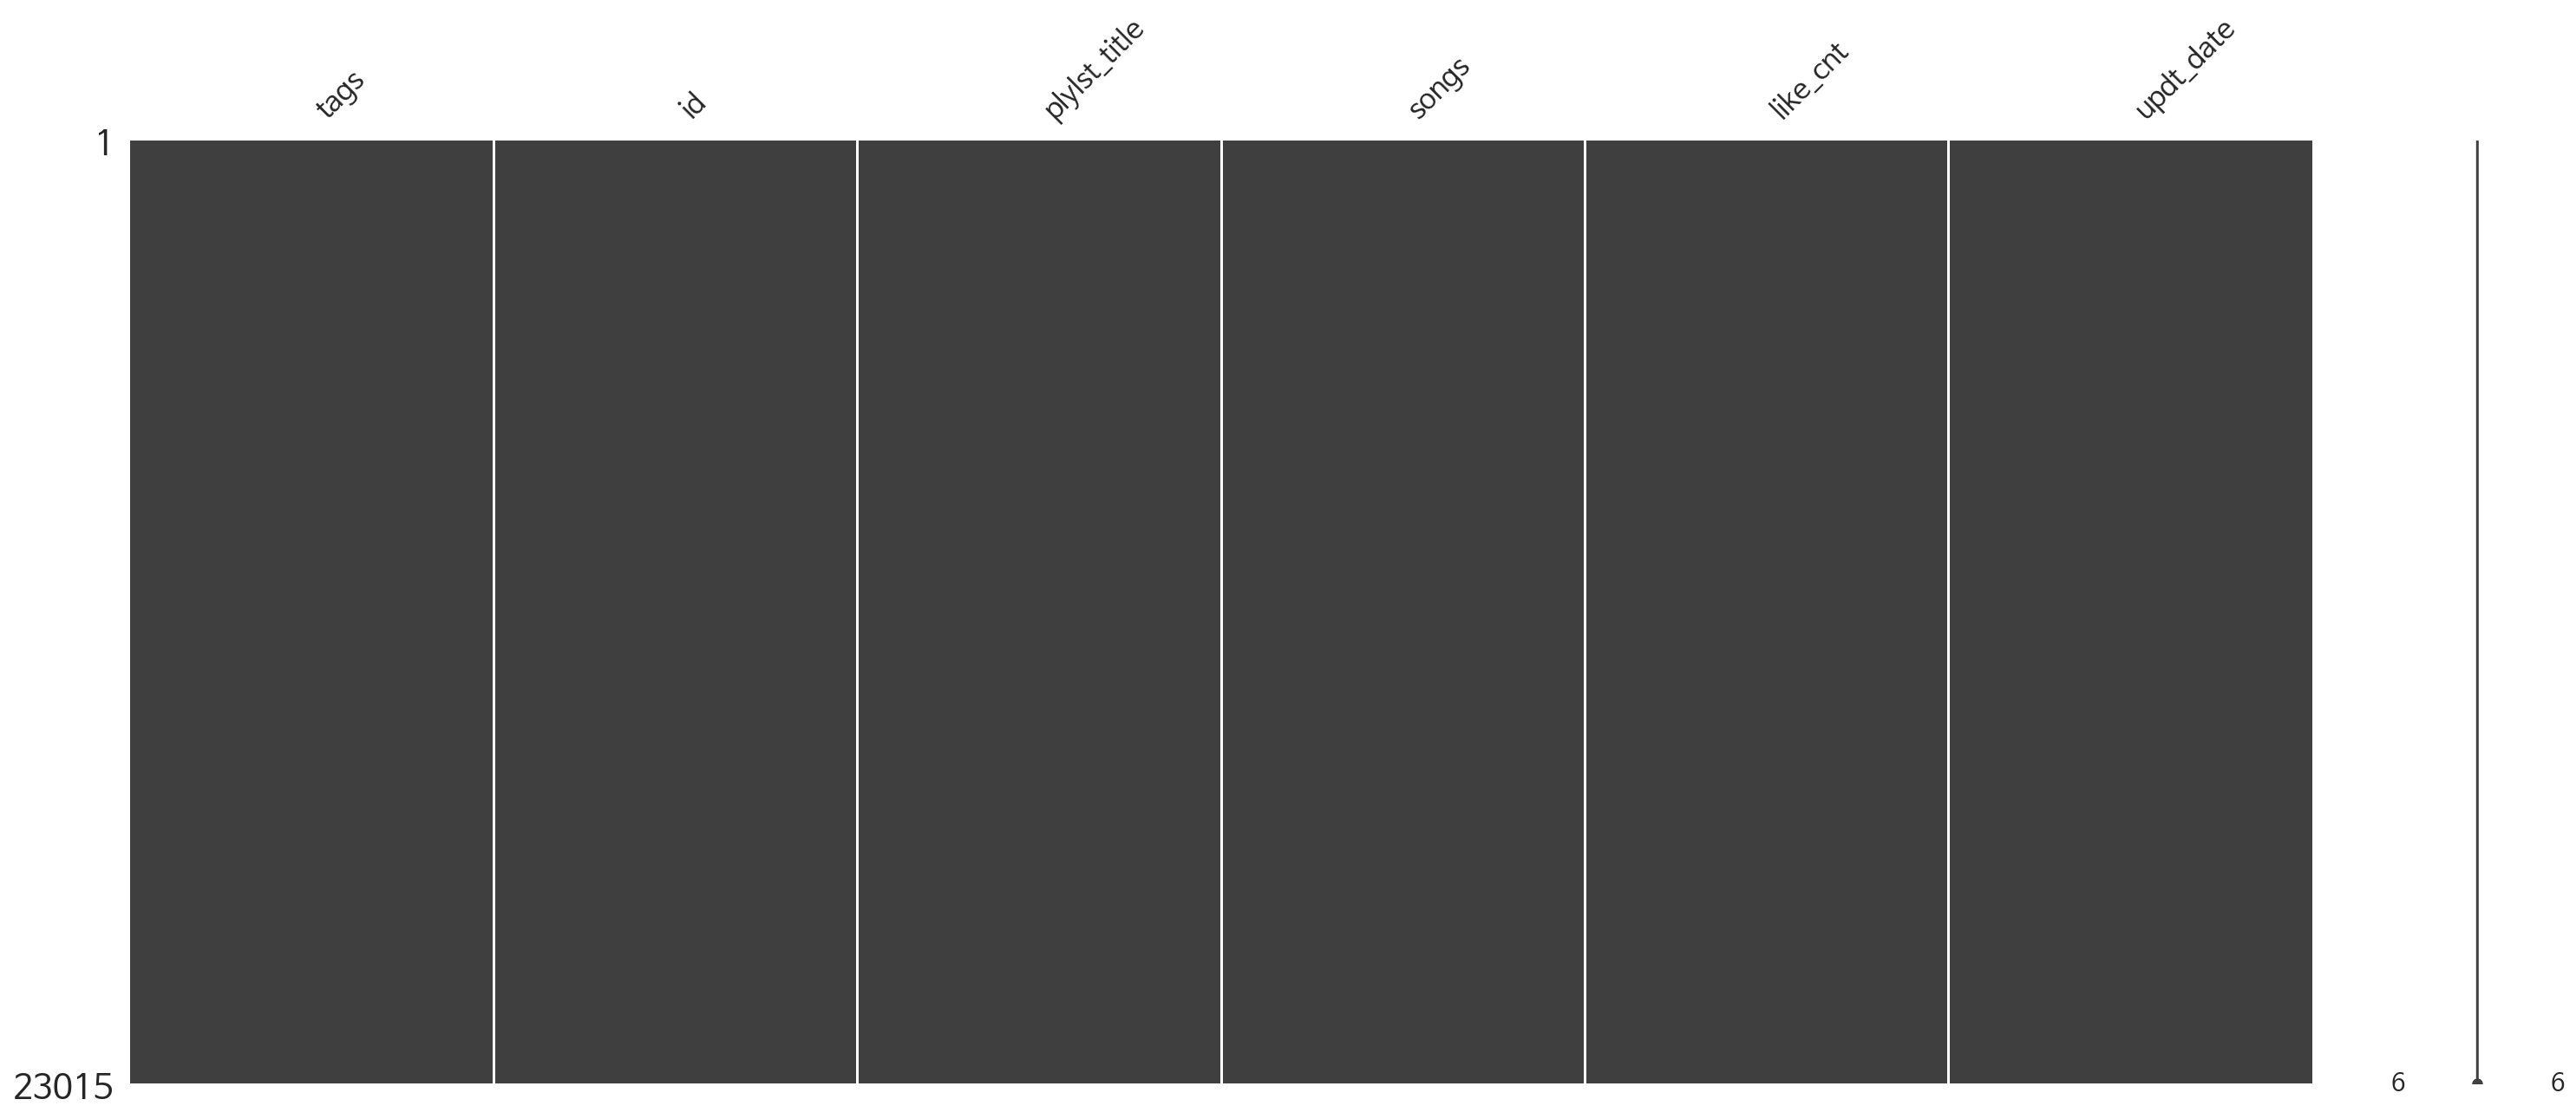

In [28]:
msno.matrix(val)